Closed-form  intercept, slope: 2.6908413834642375 4.131841832861142
GradientDesc intercept, slope: 2.69084138327786 4.131841832919722
Final GD loss: 0.9958085506981229


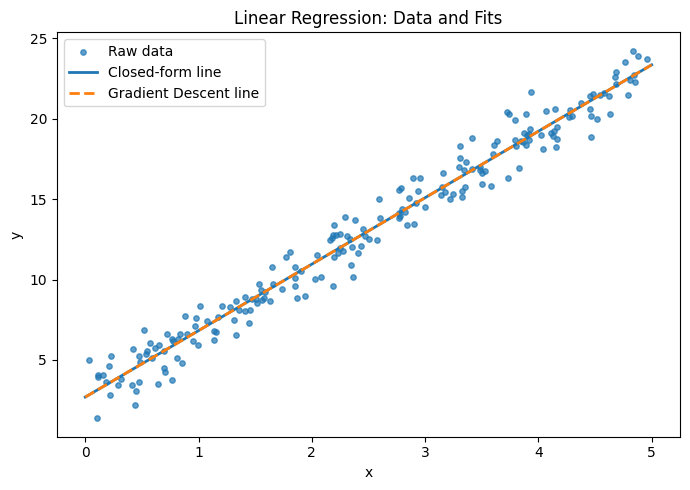

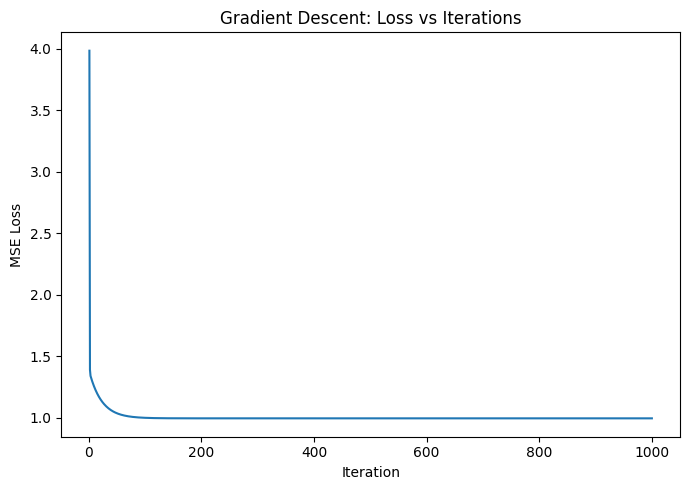

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

rng = np.random.default_rng(42)
m = 200
X_raw = rng.uniform(0, 5, size=m)
noise = rng.normal(0, 1.0, size=m)
y = 3 + 4 * X_raw + noise
X = np.c_[np.ones(m), X_raw]

XtX_inv = np.linalg.inv(X.T @ X)
theta_closed = XtX_inv @ X.T @ y
intercept_closed, slope_closed = theta_closed

eta = 0.05
n_iters = 1000
theta = np.zeros(2)
loss_history = []

def mse_loss(theta, X, y):
    preds = X @ theta
    return np.mean((preds - y) ** 2)

for i in range(n_iters):
    preds = X @ theta
    grad = (2/len(X)) * (X.T @ (preds - y))
    theta = theta - eta * grad
    loss_history.append(mse_loss(theta, X, y))

intercept_gd, slope_gd = theta

xs = np.linspace(0,5,200)
ys_closed = intercept_closed + slope_closed * xs
ys_gd = intercept_gd + slope_gd * xs

fig1 = plt.figure(figsize=(7,5))
plt.scatter(X_raw, y, s=15, alpha=0.7, label="Raw data")
plt.plot(xs, ys_closed, linewidth=2, label="Closed-form line")
plt.plot(xs, ys_gd, linewidth=2, linestyle="--", label="Gradient Descent line")
plt.xlabel("x"); plt.ylabel("y"); plt.title("Linear Regression: Data and Fits"); plt.legend(loc="best")
fig1.tight_layout()

fig2 = plt.figure(figsize=(7,5))
plt.plot(np.arange(1, n_iters+1), loss_history)
plt.xlabel("Iteration"); plt.ylabel("MSE Loss"); plt.title("Gradient Descent: Loss vs Iterations")
fig2.tight_layout()

img1_path = "linear_regression_fits.png"
img2_path = "gd_loss_curve.png"
fig1.savefig(img1_path, dpi=180, bbox_inches="tight")
fig2.savefig(img2_path, dpi=180, bbox_inches="tight")

with PdfPages("linear_regression_gd_report.pdf") as pdf:
    pdf.savefig(fig1, bbox_inches="tight")
    pdf.savefig(fig2, bbox_inches="tight")

print("Closed-form  intercept, slope:", intercept_closed, slope_closed)
print("GradientDesc intercept, slope:", intercept_gd, slope_gd)
print("Final GD loss:", loss_history[-1])